## Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Explainify\data\raw\customer_data.csv")

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

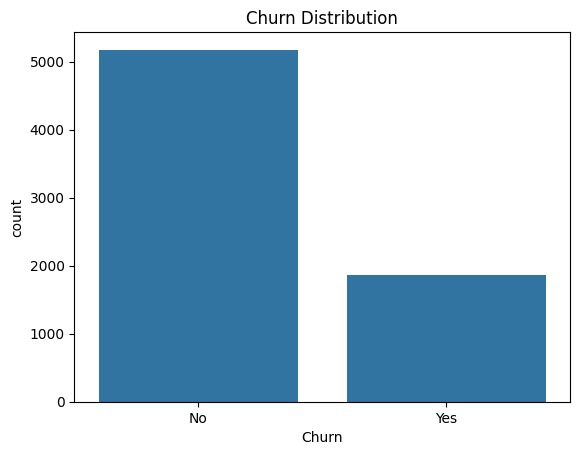

In [29]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
num_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = df.select_dtypes(include=["object", "bool"]).columns.tolist()
cat_features.remove("Churn")

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


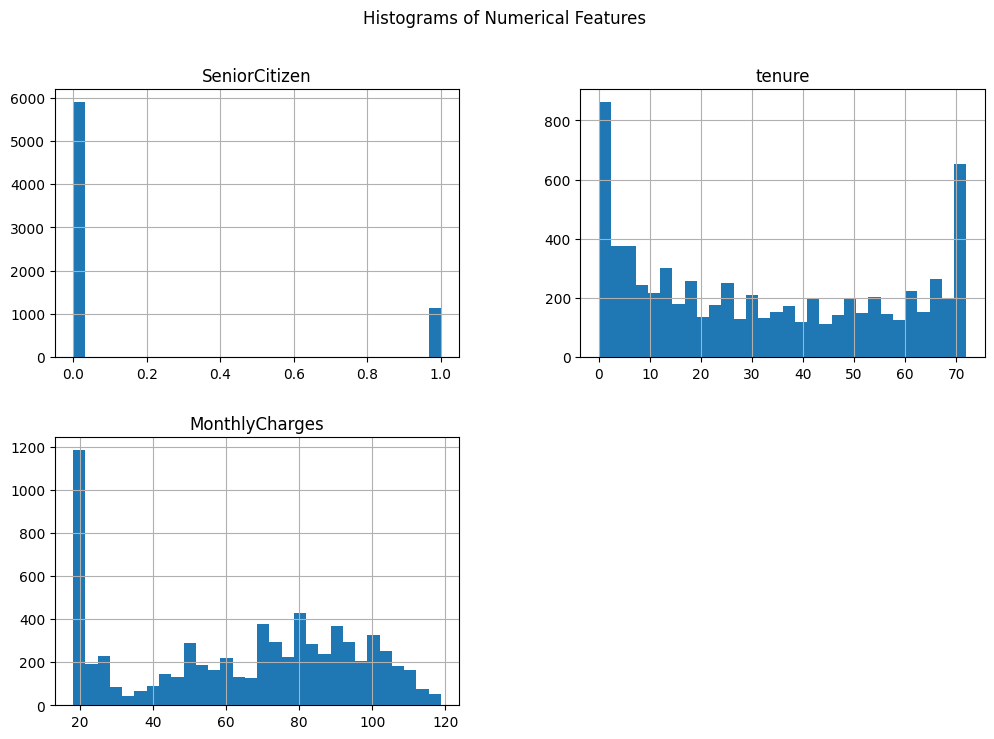

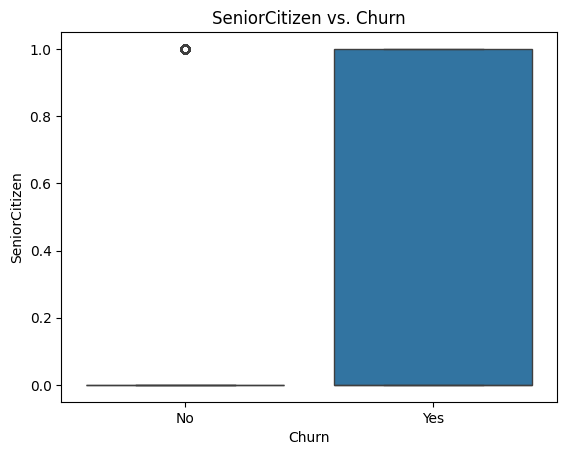

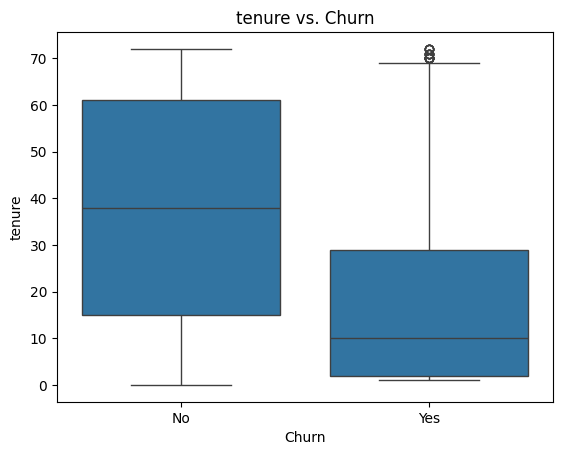

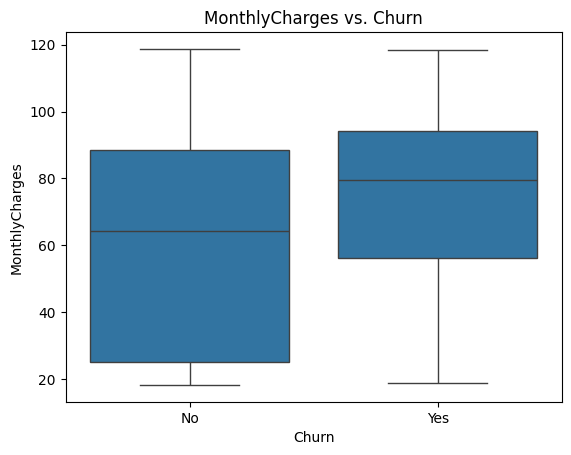

In [33]:
df[num_features].hist(bins = 30, figsize = (12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

for col in num_features:
    sns.boxplot(data = df, x = "Churn", y = col)
    plt.title(f"{col} vs. Churn")
    plt.show()


Categorical

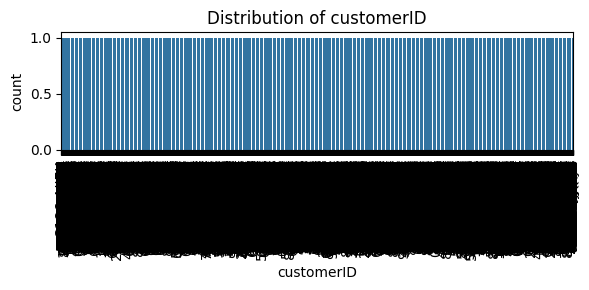

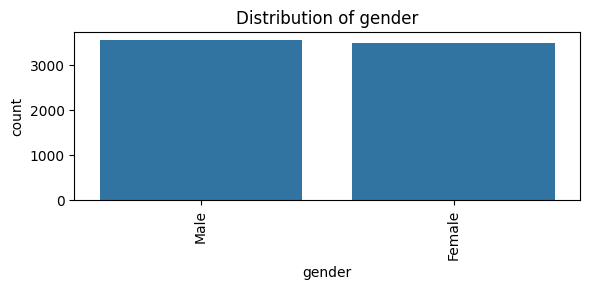

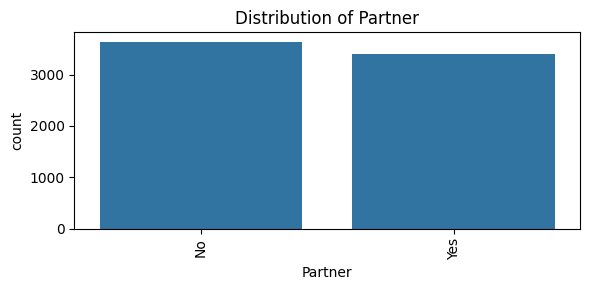

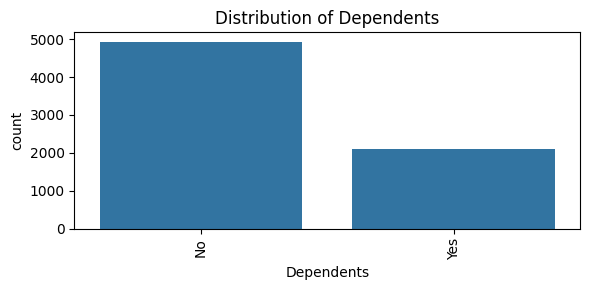

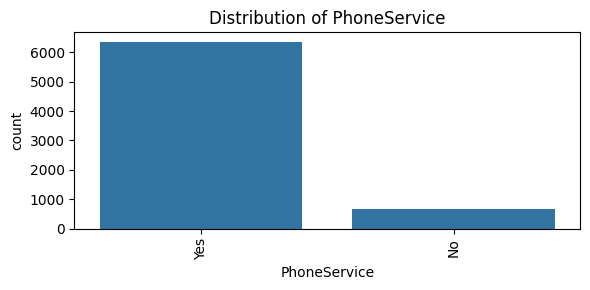

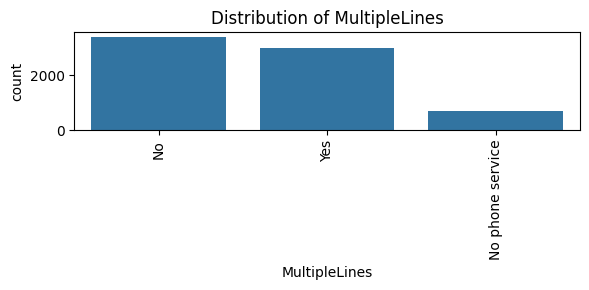

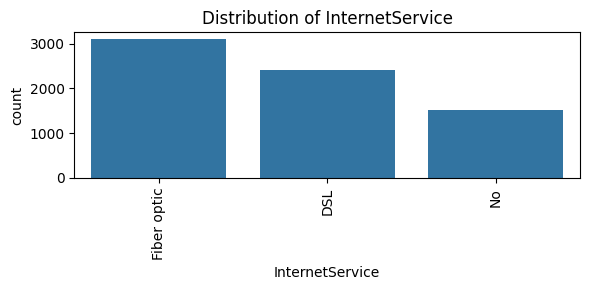

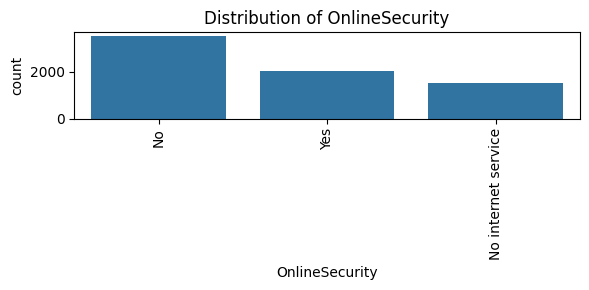

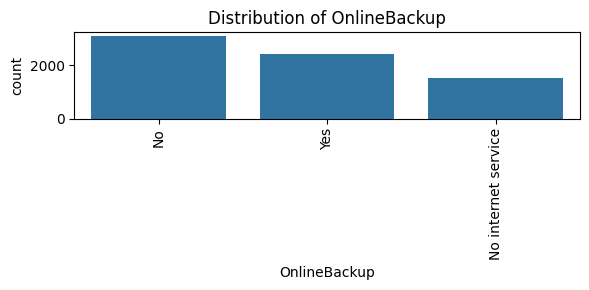

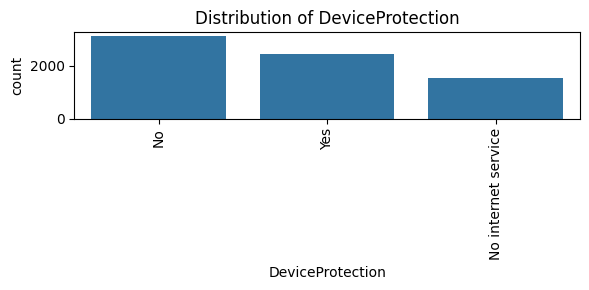

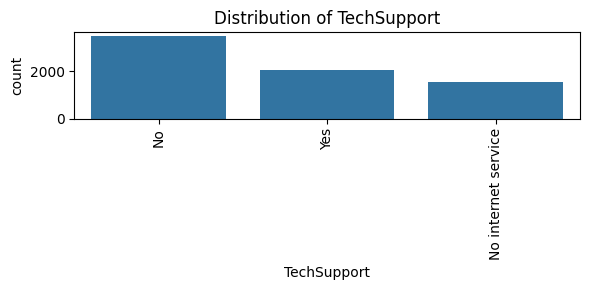

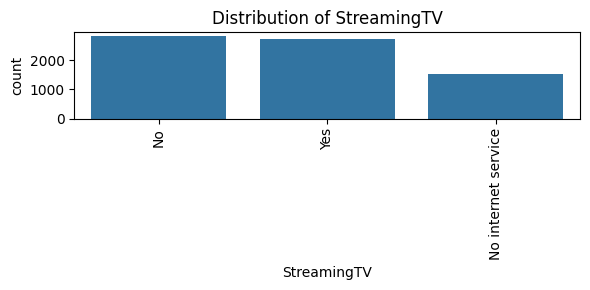

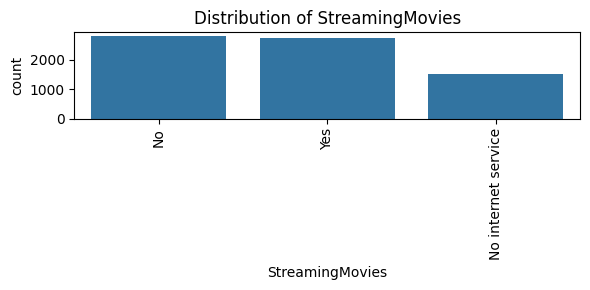

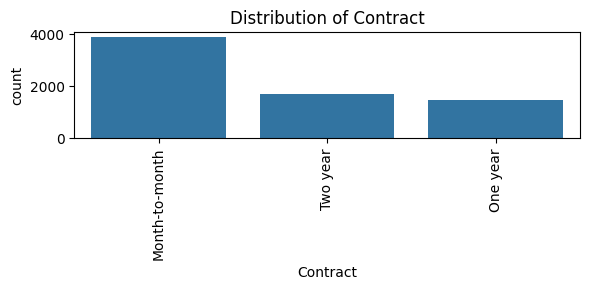

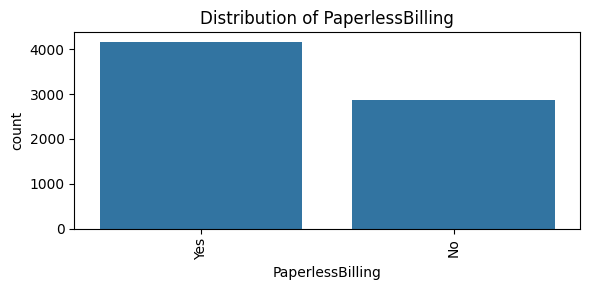

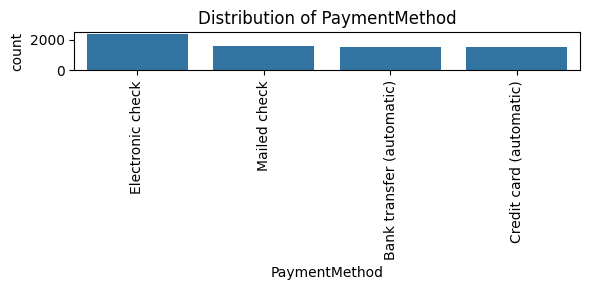

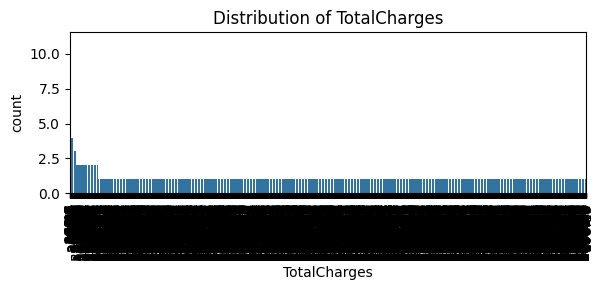

In [34]:
for col in cat_features:
    plt.figure(figsize = (6, 3))
    sns.countplot(data = df, x = col, order = df[col].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

Numerical

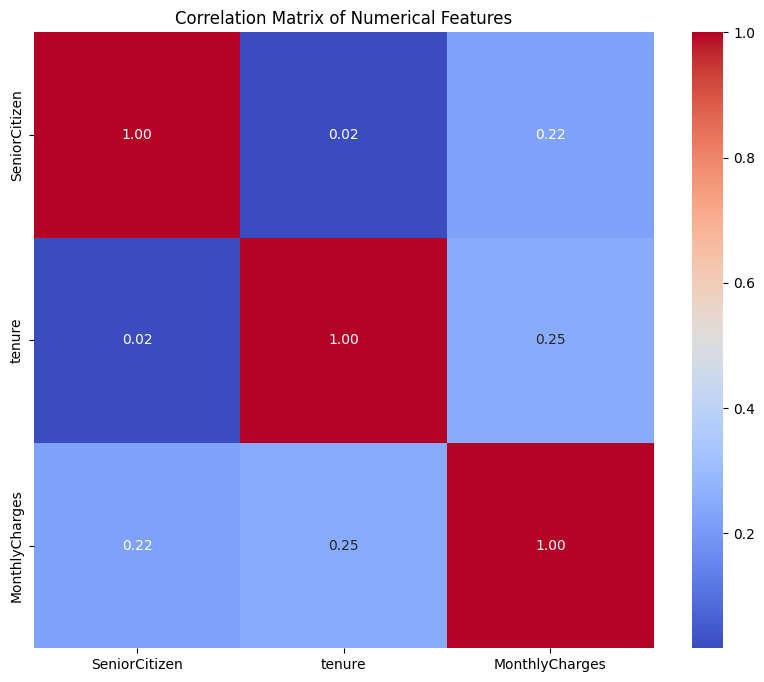

Highly correlated feature pairs (r > 0.8):


In [ ]:
corr = df[num_features].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# High correlation
threshold = 0.8
corr_pairs = corr.abs().unstack().sort_values(ascending=False)
high_corr = [(a, b, corr.loc[a, b]) for a, b in corr_pairs.index if a != b and corr.loc[a, b] > threshold]
print("Highly correlated feature pairs (r > 0.8):")
for a, b, val in high_corr:
    print(f"{a} ↔ {b}: {val:.4f}")

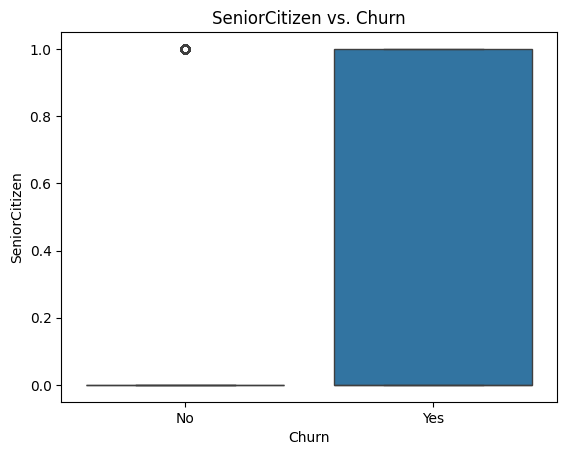

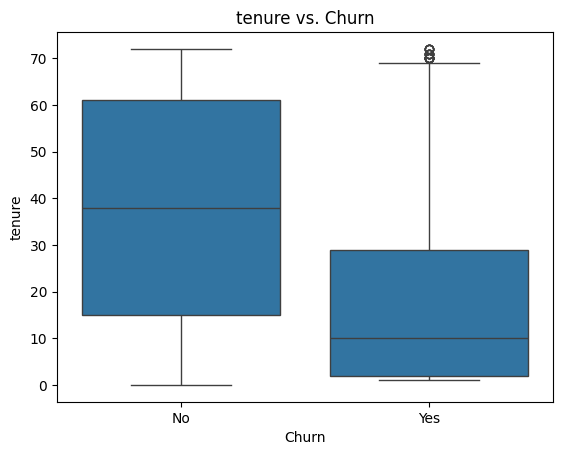

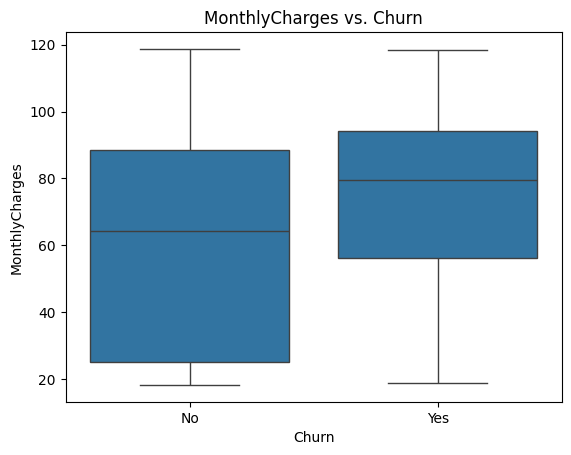

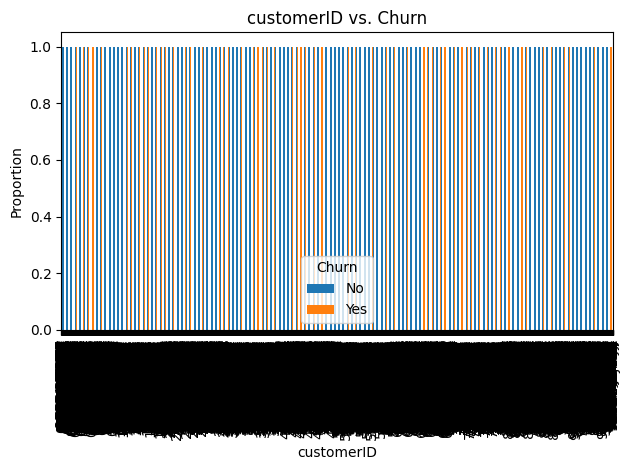

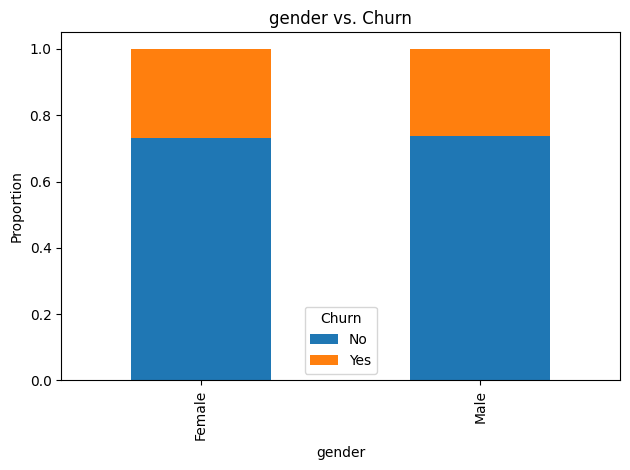

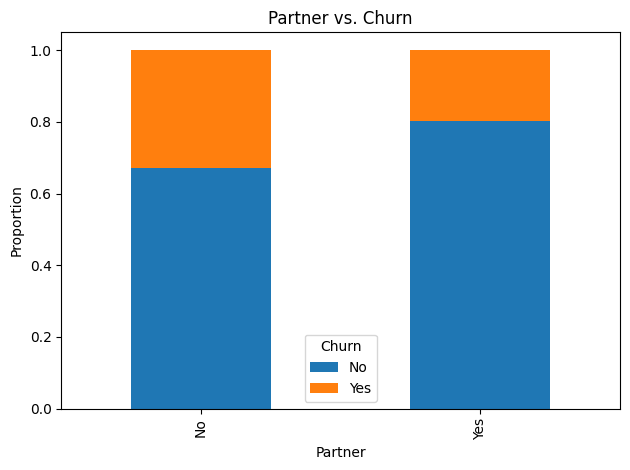

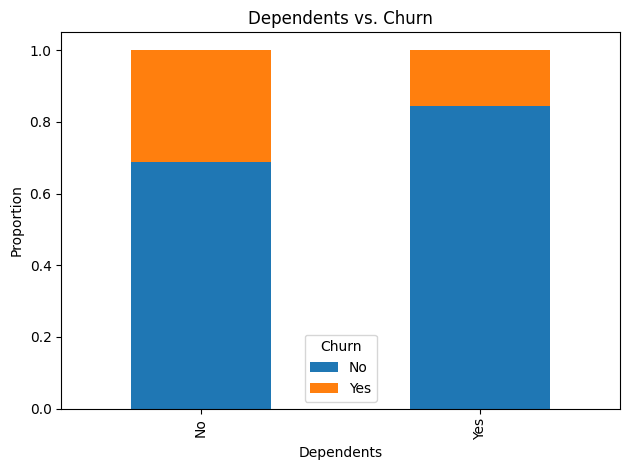

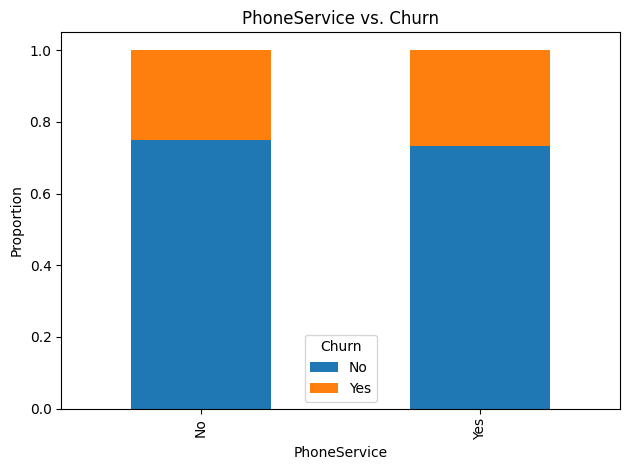

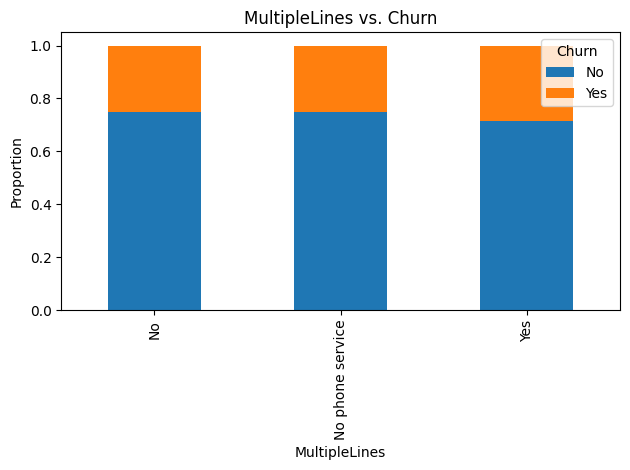

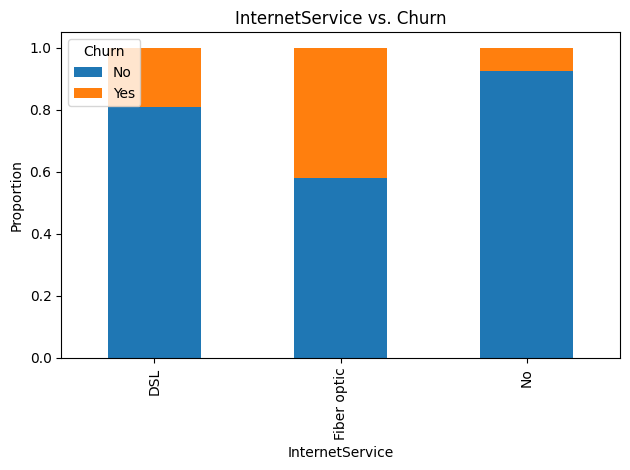

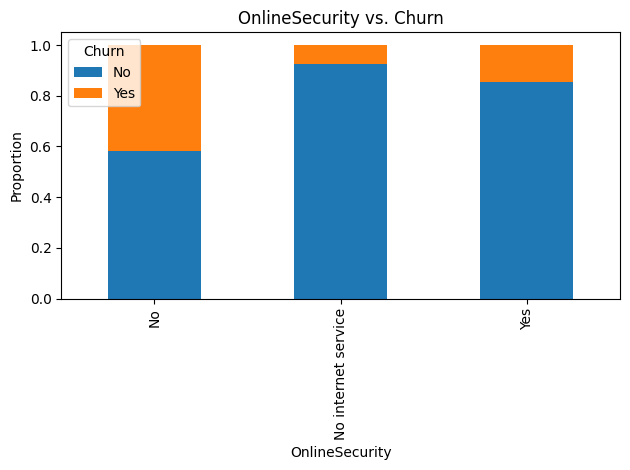

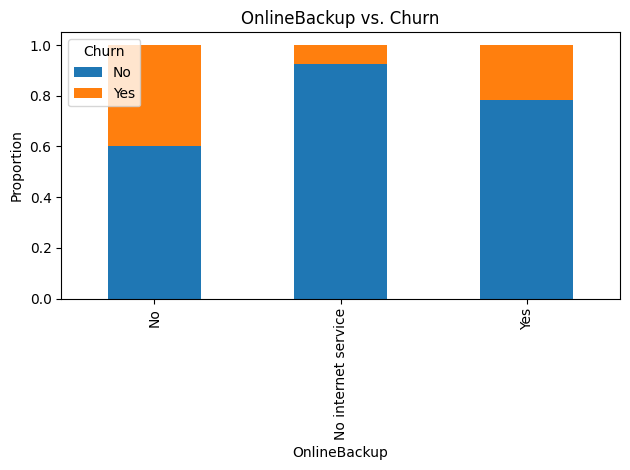

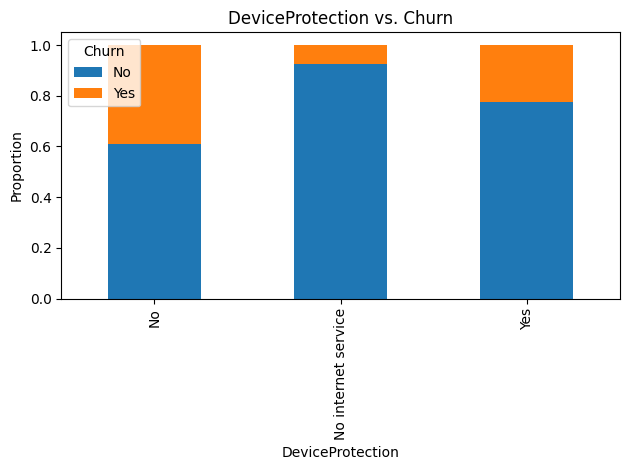

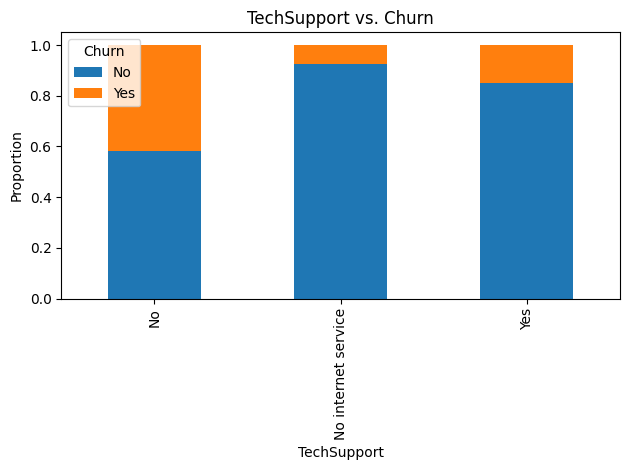

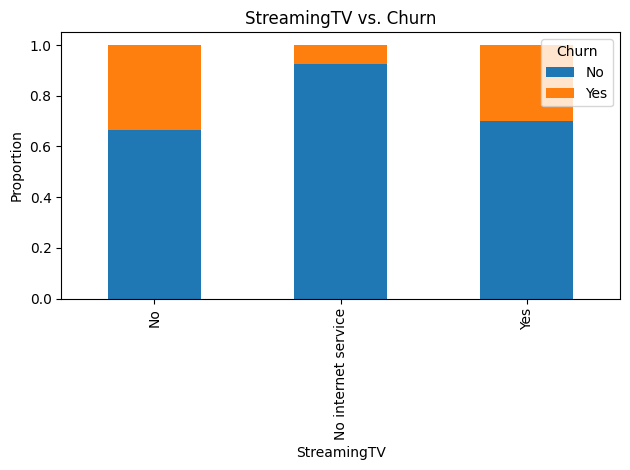

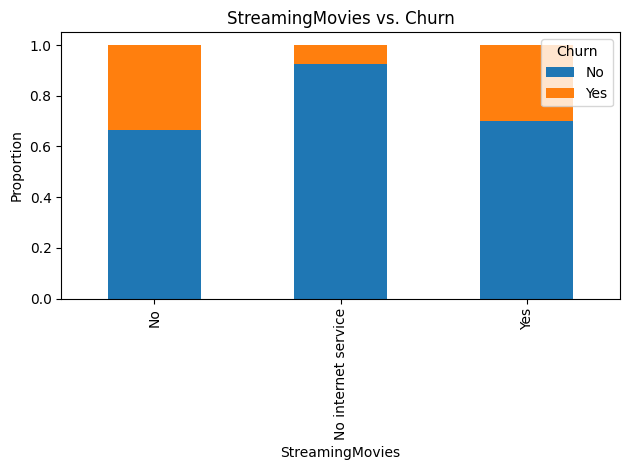

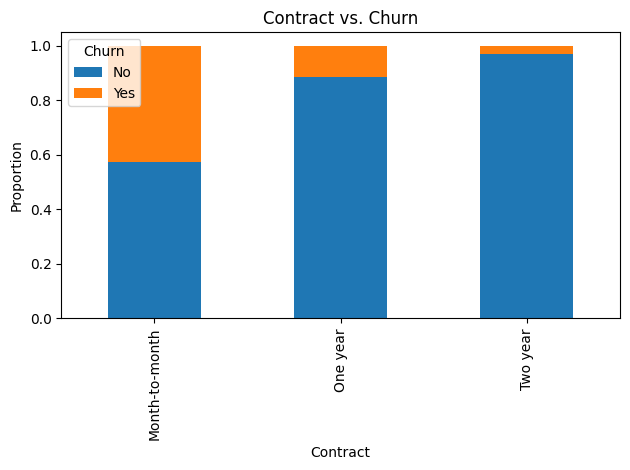

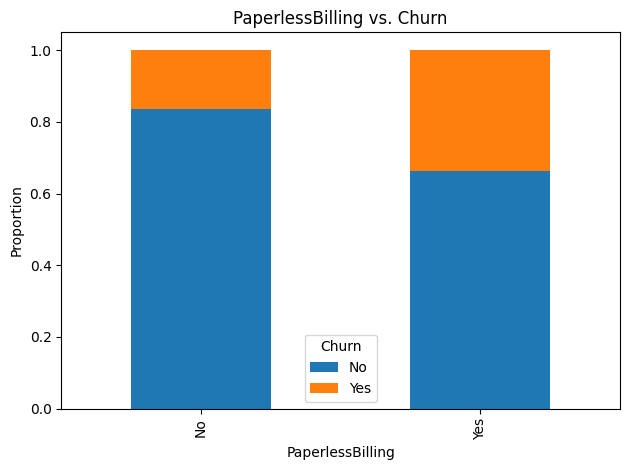

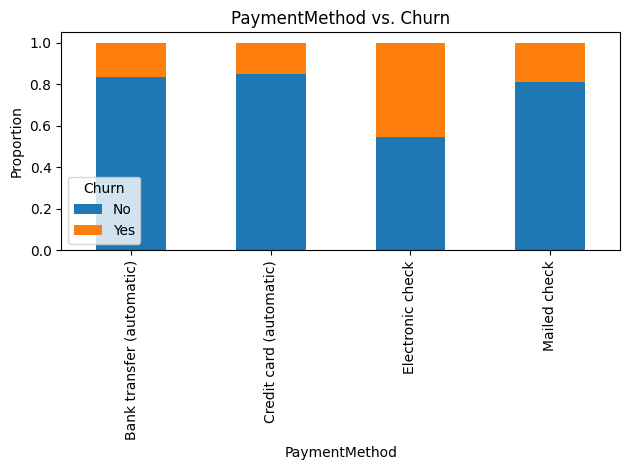

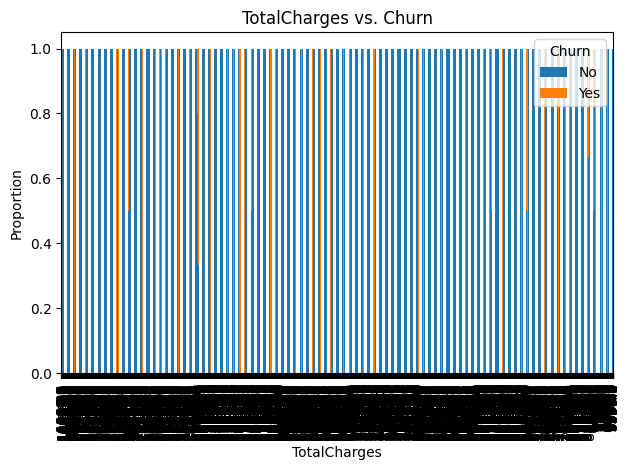

In [24]:
for col in num_features:
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs. Churn")
    plt.show()

# Categorical Features vs Churn
for col in cat_features:
    ctab = pd.crosstab(df[col], df["Churn"], normalize="index")
    ctab.plot(kind="bar", stacked=True)
    plt.title(f"{col} vs. Churn")
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()